<img align="left" src = https://linea.org.br/wp-content/themes/LIneA/imagens/logo-header.jpg width=130 style="padding: 20px"> 

# Photo-z Compute Scalability Tests
## Optimizing software infrastructure to compute photo-zs in the LSST scale: preparing for LSST DR1.

<br><br>


Julia Gschwend, Heloisa Mengisztki, Cristiano Singulani, Henrique Dante


**Last verified run**: 2023-July-25  
 
--- 



## Abstract




## Introduction


### Motivation - BRA-LIN S4 


### RAIL by DESC

### The Pipeline Photo-z Compute 

Henrique's presentation: [Slides](https://docs.google.com/presentation/d/1ZqhccrUt0zj4csbQzMaZNuwUiiXzfcBhhaDZG1Zq-Fg/edit?usp=sharing), [video part 1](https://youtu.be/mk16RJaqKLw), [video part 2](https://youtu.be/tdOo0NbcqOs)

[Project Briefing](https://drive.google.com/file/d/1z82TTF2JvHRxwqWGIpFSaffEmPcgpJx8/view?usp=sharing)

[Project Report](https://drive.google.com/file/d/1DgR0i1nkVABjfRK1gkpyVMqH75oWi57l/view?usp=sharing)


### Simulated Data: LSST DP0.2  

`/lustre/t0/scratch/users/heloisa.mengisztki`

`/lustre/t0/scratch/users/julia/pcw_2023/`

`/lustre/t1/cl/lsst/pz_project/pcw_2023/`



### Hardware infrastructure - cluster Apollo characteristics 

Servidor HPE ProLiant XL170r Gen10 CTO Svr	2x Intel Xeon Gold 5120, 2.2GHz 14 Cores. 128GB de memória (16X 8GB DDR4 DIM 2666), 2x Disco 1TB SAS 12Gb 7x2Krpm. 1x PCIe 2-Port InfiniBand EDR 100 Gb Adapter.	16


In [1]:
apollo_dict = {'10.148.0.11' : 'apl01', 
                '10.148.0.12' : 'apl02', 
                '10.148.0.13' : 'apl03', 
                '10.148.0.14' : 'apl04', 
                '10.148.0.15' : 'apl05', 
                '10.148.0.16' : 'apl06', 
                '10.148.0.17' : 'apl07', 
                '10.148.0.18' : 'apl08', 
                '10.148.0.19' : 'apl09', 
                '10.148.0.27' : 'apl10', 
                '10.148.0.28' : 'apl11', 
                '10.148.0.29' : 'apl12', 
                '10.148.0.30' : 'apl13', 
                '10.148.0.31' : 'apl14', 
                '10.148.0.32' : 'apl15'}

 `$ nslookup 10.148.0.13 | grep name` 


| IP Address | node name |
| --- | :-: |
|10.148.0.11| apl01|
|10.148.0.12| apl02|
|10.148.0.13| apl03|
|10.148.0.14| apl04|
|10.148.0.15| apl05|
|10.148.0.16| apl06|
|10.148.0.17| apl07|
|10.148.0.18| apl08|
|10.148.0.19| apl09|
|10.148.0.27| apl10|
|10.148.0.28| apl11|
|10.148.0.29| apl12|
|10.148.0.30| apl13|
|10.148.0.31| apl14|
|10.148.0.32| apl15|


## Methodology





## Results


Tabelão de rodadas na [planilha](https://docs.google.com/spreadsheets/d/1GKlDhLx7oXTjwBXoj8pzfrqnE7X-4nUW2sYDuY-tx94/edit?usp=sharing). 

medidas: 
- tempo total de cada teste (1 número por teste)
por job (x1935):
    - tempo de duração de cada job em cada teste (para testes com pre-proc default, array com 1935 medidas)
    - número de objetos por arquivo 
    - tamanho em bytes por arquivo
    - velocidade de cálculo do photo-z em ms/obj 
    - velocidade de cálculo do photo-z em MB/min (unidade a definir)    
- distrubuição de velocidades 
    - média
    - desvio padrão 
    - comparações c/ testes estatísticos pra responder às perguntas:
        - arredondar csas decimais nas mags faz diferença 
        - ler e escrtever no T0 faz diferença
        - 

### Test linearity of the relationship between the total time and the data size

The DP0.2 data was downloaded from the Rubin's storage space on Google Cloud. 

[arXiv:2010.05926](https://arxiv.org/abs/2010.05926)

https://dp0-2.lsst.io/data-products-dp0-2/index.html 

 Data Products Definitions Document (DPDD): https://lse-163.lsst.io/


Original catalog key mumbers: 

| DP0.2 Key numbers |  
| --- |
| 157 original files (1.0 TB)| 
| 1935 skinny tables (33 GB) |
| 300 deg$^{2}$  | 
|278,318,452 objects| 
| LSST's wide-fast-deep 5-year depth | 
| 6 filters: $u, g, r, i, z, Y$ | 


TBD: plot file size distribution 



To verify the dependency of total time on the dataset size, supposely linear, we estimated photo-zs for diferent subsets and for 2 copies of the full dataset using the same infrastructure. For this test, we used the odd nodes of cluster Apollo (apl01, apl03, apl05, apl07, apl09, apl11, apl13, apl15).  

Summary or runs: 

|Dataset | Pre-processed files | Size (GB) | Rows | FlexZBoost runtime | FlexZBoost average speed (ms/obj) | BPZ runtime | BPZ  average speed (ms/obj) | 
|:--|:-:|:-:|:-:|:-:|:-:|:-:|:-:|
|first 50 files  |  620 | 11 |  88,895,872 | 0:11:07 | 0.008 ms/obj | 0:07:52 | 0.005 ms/obj | 
|first 100 files | 1244 | 21 | 178,386,176 | 0:24:47 | 0.008 ms/obj | 0:14:48 | 0.005 ms/obj | 
|first 150 files | 1855 | 31 | 266,835,897 | 0:30:26 | 0.007 ms/obj | 0:26:24 | 0.006 ms/obj | 
|2x (314 files)  | 3870 | 66 | 556,636,904 | 0:57:25 | 0.006 ms/obj | 0:42:52 | 0.005 ms/obj | 


Summary or runs, removing jobs run by apl13 and apl15 (UPDATE): 


|Sample | Skinny tables | Size (GB) | Rows | FlexZBoost runtime | FlexZBoost average speed (ms/obj) | BPZ runtime | BPZ  average speed (ms/obj) | 
|:--|:-:|:-:|:-:|:-:|:-:|:-:|:-:|
|first 50 files  |  620 | 11 |  88,895,872 | 0:11:07 | 0.008 ms/obj | 0:07:52 | 0.005 ms/obj | 
|first 100 files | 1244 | 21 | 178,386,176 | 0:24:47 | 0.008 ms/obj | 0:14:48 | 0.005 ms/obj | 
|first 150 files | 1855 | 31 | 266,835,897 | 0:30:26 | 0.007 ms/obj | 0:26:24 | 0.006 ms/obj | 
|2x (314 files)  | 3870 | 66 | 556,636,904 | 0:57:25 | 0.006 ms/obj | 0:42:52 | 0.005 ms/obj | 




In [2]:
# test_name = ['50 files', '100 files', '150 files', '314 files']#, '1570 files']
# n_rows = [88895872, 178386176, 266835897, 556636904]#, 2783184520]
#fzboost = ['0:11:07', '0:24:47', '0:30:26', '0:57:25']#, '3:15:12'] 
#bpz = ['0:07:52', '0:14:48', '0:26:24', '0:42:52']#, None]

In [3]:
# fzboost_runtime = []
# bpz_runtime = []
# for i in range(4): #5 
#     fzb_time = time.strptime(fzboost[i],'%H:%M:%S')
#     fzboost_runtime.append(datetime.timedelta(hours=fzb_time.tm_hour,
#                             minutes=fzb_time.tm_min,
#                             seconds=fzb_time.tm_sec).total_seconds())
    
# for i in range(4): 
#     bpz_time = time.strptime(bpz[i],'%H:%M:%S')
#     bpz_runtime.append(datetime.timedelta(hours=bpz_time.tm_hour,
#                             minutes=bpz_time.tm_min,
#                             seconds=bpz_time.tm_sec).total_seconds())

# print(f'FlexZBoost: {fzboost_runtime}')
# print(f'BPZ:        {bpz_runtime}')

In [4]:
# data_dict = {'test name': ['50 files', '100 files', '150 files', '314 files', #'1570 files',
#                            '50 files', '100 files', '150 files', '314 files'],
#              'size (objects)': [88895872, 178386176, 266835897, 556636904, #2783184520,
#                                 88895872, 178386176, 266835897, 556636904], 
#              'total time': [667.0, 1487.0, 1826.0, 3445.0, #11712.0, #/15.*8., 
#                             472.0, 888.0, 1584.0, 2572.0],
#              'pz code': ['fzboost', 'fzboost', 'fzboost', 'fzboost', #'fzboost', 
#                          'bpz', 'bpz', 'bpz', 'bpz']}
# df = pd.DataFrame(data_dict)
# df

In [5]:
# sns.set_style('whitegrid')
# sns.lmplot(x ='size (objects)', y ='total time', data = df, 
#            hue ='pz code', markers =['o', 'v'])
# plt.tight_layout()

In [188]:
import numpy as np
import pandas as pd
import tables_io
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
import datetime 
import time 

%matplotlib inline

In [7]:
# FlexZBoost
df_fzb_50 = pd.read_csv('results/tests/test_fzboost_50_files.csv') # 620 pre-processed files 
df_fzb_100 = pd.read_csv('results/tests/test_fzboost_100_files.csv') # 1244 pre-processed files
df_fzb_150 = pd.read_csv('results/tests/test_fzboost_150_files.csv') # 1855 pre-processed files
df_fzb_2x = pd.read_csv('results/tests/test_fzboost_2x_files.csv') #314 original files = 3870 pre-processed files
# BPZ
df_bpz_50 = pd.read_csv('results/tests/test_bpz_50_files.csv')
df_bpz_100 = pd.read_csv('results/tests/test_bpz_100_files.csv')
df_bpz_150 = pd.read_csv('results/tests/test_bpz_150_files.csv')
df_bpz_2x = pd.read_csv('results/tests/test_bpz_2x_files.csv')
# Henrique


In [8]:
fzboost_runs = {'fzboost 50 files' : df_fzb_50, 
                'fzboost 100 files': df_fzb_100, 
                'fzboost 150 files': df_fzb_150, 
                'fzboost 2x files' : df_fzb_2x}
bpz_runs     = {'bpz 50 files' : df_bpz_50, 
                'bpz 100 files': df_bpz_100, 
                'bpz 150 files': df_bpz_150, 
                'bpz 2x files' : df_bpz_2x}

In [9]:
df_fzb_50.columns

Index(['task_id', 'time_begin', 'time_end', 'time_diff', 'file_name', 'chunks',
       'host'],
      dtype='object')

In [10]:
df_fzb_50.head()

,task_id,time_begin,time_end,time_diff,file_name,chunks,host
0,7,1900-07-14 00:52:28,1900-07-14 00:55:23,175.0,objectTable_tract_2901_DC2_2_2i_runs_DP0_2_v23...,139540,10.148.0.13
1,47,1900-07-14 00:52:30,1900-07-14 00:55:47,197.0,objectTable_tract_2897_DC2_2_2i_runs_DP0_2_v23...,139082,10.148.0.13
2,39,1900-07-14 00:52:30,1900-07-14 00:55:57,207.0,objectTable_tract_3259_DC2_2_2i_runs_DP0_2_v23...,139892,10.148.0.13
3,31,1900-07-14 00:52:30,1900-07-14 00:56:02,212.0,objectTable_tract_3260_DC2_2_2i_runs_DP0_2_v23...,140337,10.148.0.13
4,23,1900-07-14 00:52:28,1900-07-14 00:56:04,216.0,objectTable_tract_2899_DC2_2_2i_runs_DP0_2_v23...,149427,10.148.0.13


In [11]:
df_fzb_50.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 620 entries, 0 to 619
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   task_id     620 non-null    int64  
 1   time_begin  620 non-null    object 
 2   time_end    620 non-null    object 
 3   time_diff   620 non-null    float64
 4   file_name   620 non-null    object 
 5   chunks      620 non-null    int64  
 6   host        620 non-null    object 
dtypes: float64(1), int64(2), object(4)
memory usage: 34.0+ KB


In [12]:
for test_name, results_df in fzboost_runs.items():
    hosts = [] 
    for key, value in apollo_dict.items():
        if key in results_df['host'].unique():
            hosts.append(value)
    print(f'Hosts present in {test_name}: {hosts}')
for test_name, results_df in bpz_runs.items():
    hosts = [] 
    for key, value in apollo_dict.items():
        if key in results_df['host'].unique():
            hosts.append(value)
    print(f'Hosts present in {test_name}: {hosts}')

Hosts present in fzboost 50 files: ['apl01', 'apl03', 'apl05', 'apl07', 'apl09', 'apl11', 'apl13', 'apl15']
Hosts present in fzboost 100 files: ['apl01', 'apl03', 'apl05', 'apl07', 'apl09', 'apl11', 'apl13', 'apl15']
Hosts present in fzboost 150 files: ['apl01', 'apl03', 'apl05', 'apl07', 'apl09', 'apl11', 'apl13', 'apl15']
Hosts present in fzboost 2x files: ['apl01', 'apl03', 'apl05', 'apl07', 'apl09', 'apl11', 'apl13', 'apl15']
Hosts present in bpz 50 files: ['apl01', 'apl03', 'apl05', 'apl07', 'apl09', 'apl11', 'apl13', 'apl15']
Hosts present in bpz 100 files: ['apl01', 'apl03', 'apl05', 'apl07', 'apl09', 'apl11', 'apl13', 'apl15']
Hosts present in bpz 150 files: ['apl01', 'apl03', 'apl05', 'apl07', 'apl09', 'apl11', 'apl13', 'apl15']
Hosts present in bpz 2x files: ['apl01', 'apl03', 'apl05', 'apl07', 'apl09', 'apl11', 'apl13', 'apl15']


In [13]:
for results_df in fzboost_runs.values():
    results_df['speed'] = (results_df['time_diff']/results_df['chunks'])*1000.
for results_df in bpz_runs.values():
    results_df['speed'] = (results_df['time_diff']/results_df['chunks'])*1000.

In [14]:
colors_blue = {'apl02' : '#0000FF', # (Blue)
                'apl04' : '#4169E1', # (Royal Blue)
                'apl06' : '#1E90FF', # (Dodger Blue)
                'apl08' : '#6495ED', # (Cornflower Blue)
                'apl10' : '#00BFFF', # (Deep Sky Blue)
                'apl12' : '#1E88E5', # (Blue (Vivid)
                'apl14' : '#4682B4'} # (Steel Blue)
                # 'apl16' : '#5F9EA0', # (Cadet Blue)
                # 'apl09' : '#87CEEB', # (Sky Blue)
                # 'apl10' : '#87CEFA', # (Light Sky Blue)
                # 'apl11' : '#ADD8E6', # (Light Blue)
                # 'apl12' : '#B0E0E6'} # (Powder Blue)

    
colors_green = {'apl02' : '#006400', # (Dark Green)
               'apl04' : '#008000', # (Green)
               'apl06' : '#0F9D58', # (Emerald Green)
               'apl08' : '#228B22', # (Forest Green)
               'apl10' : '#2E8B57', # (Sea Green)
               'apl12' : '#32CD32', # (Lime Green)
               'apl14' : '#3CB371'} # (Medium Sea Green)
               # 'apl0' : '#66CDAA', # (Medium Aquamarine)
               # 'apl0' : '#98FB98', # (Pale Green)
               # 'apl0' : '#ADFF2F', # (Green Yellow)
               # 'apl' : '#C0FF3E', # (Yellow Green)
               # 'apl' : '#DAF7A6'} # (Mint Green)  

In [15]:
means = {}
medians = {}
std = {}
error = {}

for test_name, results_df in fzboost_runs.items():
    means[test_name] = np.mean(results_df['speed'])
    medians[test_name] = np.median(results_df['speed'])
    std[test_name] = np.std(results_df['speed'])
    error[test_name] = stats.bootstrap([results_df['speed']], np.mean, n_resamples=100)

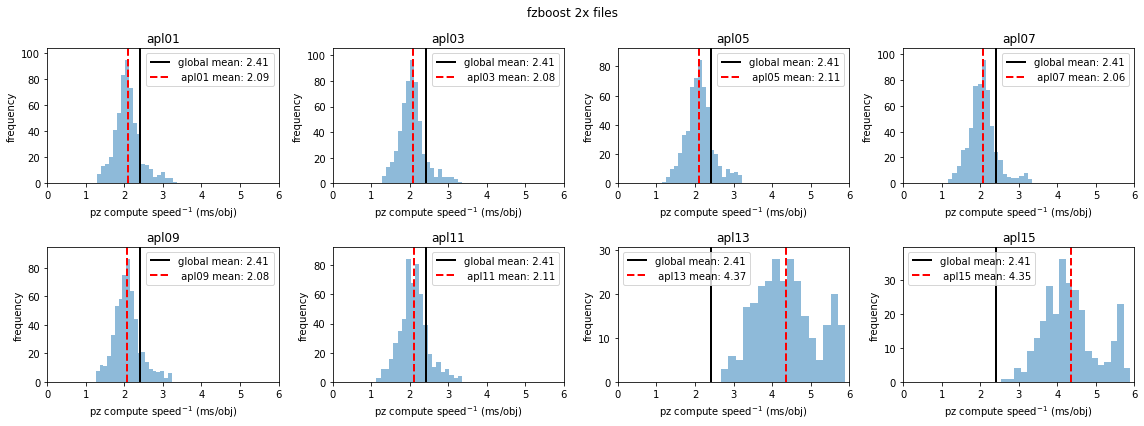

In [16]:
test = 'fzboost 2x files'
plt.figure(figsize=[16,6])
plt.suptitle(test)
i=0
for key, value in apollo_dict.items(): 
    if value in hosts:
        i+=1
        plt.subplot(2,4,i)
        plt.title(value)
        speeds = fzboost_runs[test].query(f'host == "{key}"')['speed']
        n0, bins0, patches0 = plt.hist(speeds, histtype='stepfilled', 
                                       lw=2, bins=20, alpha=0.5)
        ymax = 1.1*np.max(n0)
        plt.vlines(means[test], ymin=0, ymax=ymax, lw=2, 
                   color="k", label=f'global mean: {round(means[test], 2)}')
        plt.vlines(np.mean(speeds), ymin=0, ymax=ymax, lw=2, ls="--",
                   color="r", label=f' {value} mean: {round(np.mean(speeds), 2)}')
        
        plt.legend()
        plt.xlabel('pz compute speed$^{-1}$ (ms/obj)')
        plt.ylabel('frequency')
        plt.xlim(0,6)
        plt.ylim(0,ymax)
plt.tight_layout()
plt.savefig('fzboost_2x_files_apl_odd_nodes.png')

___ 

Remove the problematic nodes from the analysis to minimize bias: 

In [17]:
query = 'host != "10.148.0.30" | host != "10.148.0.31" | host != "10.148.0.32" '  
#fast_fzboost_runs = {}
#fast_bpz_runs = {}
fast_runs = {}
for test_name, results_df in fzboost_runs.items():
    #fast_fzboost_runs[test_name] = results_df.query(query)
    fast_runs[test_name] = results_df.query(query)
for test_name, results_df in bpz_runs.items():
    #fast_bpz_runs[test_name] = results_df.query(query)    
    fast_runs[test_name] = results_df.query(query)

In [18]:
fast_runs.keys()

dict_keys(['fzboost 50 files', 'fzboost 100 files', 'fzboost 150 files', 'fzboost 2x files', 'bpz 50 files', 'bpz 100 files', 'bpz 150 files', 'bpz 2x files'])

In [19]:
def runtime(pz_results_dict, test_name):
    t1 = time.strptime(pz_results_dict[test_name]['time_begin'].max().split(' ')[-1],'%H:%M:%S')
    t0 = time.strptime(pz_results_dict[test_name]['time_begin'].min().split(' ')[-1],'%H:%M:%S')  
    t1_sec = datetime.timedelta(hours=t1.tm_hour,minutes=t1.tm_min,seconds=t1.tm_sec).total_seconds()
    t0_sec = datetime.timedelta(hours=t0.tm_hour,minutes=t0.tm_min,seconds=t0.tm_sec).total_seconds()
    dt = t1_sec-t0_sec
    return dt


In [20]:
stats_dict = {
    'test_name' : [],
    'algorithm' : [],
    'total_time' : [],
    'size' : [],
    'speed_global': [],
    'speed_mean' : [],
    'speed_median' : [],
    'speed_std' : [],
    'speed_error' : []
}

for test_name, results_df in fast_runs.items():
    stats_dict['test_name'].append(test_name)
    stats_dict['algorithm'].append(test_name.split(' ')[0])
    dt = runtime(fast_runs, test_name)
    stats_dict['total_time'].append(dt/60.)
    n_obj = np.sum(results_df['chunks'])
    stats_dict['size'].append(n_obj/1000000.)
    stats_dict['speed_global'].append(round(dt*1000./float(n_obj), 4))
    stats_dict['speed_mean'].append(round(np.mean(results_df['speed']), 2))
    stats_dict['speed_median'].append(round(np.median(results_df['speed']), 2))
    stats_dict['speed_std'].append(round(np.std(results_df['speed']), 2))
    stats_dict['speed_error'].append(round((stats.bootstrap([results_df['speed']], 
                              np.mean, n_resamples=10)).standard_error, 2))
df = pd.DataFrame(stats_dict)

In [21]:
df

,test_name,algorithm,total_time,size,speed_global,speed_mean,speed_median,speed_std,speed_error
0,fzboost 50 files,fzboost,5.450000,88.895872,0.0037,2.22,2.13,0.56,0.02
1,fzboost 100 files,fzboost,14.216667,178.386176,0.0048,2.58,2.25,1.02,0.03
2,fzboost 150 files,fzboost,23.666667,266.835897,0.0053,2.44,2.13,0.99,0.03
3,fzboost 2x files,fzboost,50.033333,556.636904,0.0054,2.41,2.12,0.90,0.01
4,bpz 50 files,bpz,4.216667,88.895872,0.0028,1.73,1.60,0.53,0.01
5,bpz 100 files,bpz,11.116667,178.386176,0.0037,1.82,1.61,0.48,0.01
6,bpz 150 files,bpz,22.050000,266.835897,0.0050,2.29,1.67,1.08,0.02
7,bpz 2x files,bpz,36.183333,556.636904,0.0039,1.78,1.62,0.45,0.01


In [22]:
# plt.plot(x1, y1, 'o', label='FlexZBoost')
# plt.plot(x2, y2, '^', label='BPZ')
# #plt.errorbar(x1, y1,)
# plt.xlabel('dataset size (number of objects)')
# plt.ylabel('total runtime')
# plt.legend()


/home/julia/miniconda3/envs/rail/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
/tmp/ipykernel_12486/3708651212.py:9: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


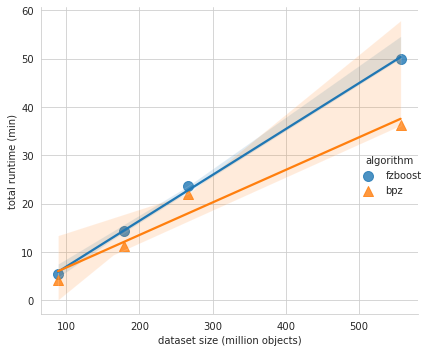

In [57]:
sns.set_style('whitegrid')
sns_plot = sns.lmplot(x ='size', y ='total_time', data = df, hue ='algorithm', 
           markers =['o', '^'], scatter_kws={"s": 100})#, facet_kws={"legend_out":True})
# plt.plot(df.query('algorithm == "fzboost"')['size'],
#          df.query('algorithm == "fzboost"')['total_time'], 'o', ms=3, label='FlexZBoost')
#plt.plot(x2, y2, '^', label='BPZ')
plt.xlabel('dataset size (million objects)')
plt.ylabel('total runtime (min)')
plt.tight_layout()
sns_plot.figure.savefig('linear.png',dpi=300)

#plt.savefig('linear.png')

#@## Correlation Test


$$ X = dataset \  size $$  
$$ Y = total \ time $$

In [24]:
result_fzboost = stats.linregress(df.query('algorithm == "fzboost"')['size'],
                                  df.query('algorithm == "fzboost"')['total_time'])
result_bpz = stats.linregress(df.query('algorithm == "bpz"')['size'],
                              df.query('algorithm == "bpz"')['total_time'])

Interpretation of the correlation coefficient (r)

The correlation coefficient (r) ranges from -1 to 1:

- \(r = -1\) indicates a perfect negative linear relationship.
- \(r = 0\) indicates no linear relationship (independence).
- \(r = 1\) indicates a perfect positive linear relationship.

we calculate the sample correlation coefficient ($r$), as a guess for the population correlation ($\rho$).  

In [25]:
print(f'FlexZBoost: r = {round(result_fzboost.rvalue,4)}')
print(f'BPZ: r = {round(result_bpz.rvalue,4)}') 

FlexZBoost: r = 0.9995
BPZ: r = 0.9807


$R^2$ means a percentual coefficient of how much of the sample variation from the mean can be explained by the X-Y linear relationship. 

In [26]:
print(f'FlexZBoost: R^2 = {round((result_fzboost.rvalue)**2,4)}')
print(f'BPZ: R^2 = {round((result_bpz.rvalue)**2,4)}') 

FlexZBoost: R^2 = 0.999
BPZ: R^2 = 0.9618


ref: https://youtu.be/nk2CQITm_eo 

Assess statistical significance: 

To test whether the correlation coefficient is significantly different from zero (i.e., whether there is a statistically significant linear relationship), you can conduct a hypothesis test. The most common approach is to perform a t-test on the correlation coefficient.

- Null hipotesis ($H_0$) = there is no linear relationship between X and Y (i.e., the population correlation ($\rho$) is zero).
- Alternative hipotesis ($H_1$) = there is a linear relationship (i.e., ($\rho$) is not zero).

 Determine the p-value
With the t-statistic, you can determine the p-value using the t-distribution with \(n-2\) degrees of freedom. The p-value represents the probability of obtaining a correlation as extreme as the one observed if the null hypothesis is true.

Make a decision: Compare the obtained p-value with the significance level (alpha) you have chosen (e.g., 0.05). If the p-value is less than alpha, you reject the null hypothesis, indicating that there is a statistically significant linear relationship between X and Y. Otherwise, you fail to reject the null hypothesis, suggesting that there is no statistically significant linear relationship.


In [27]:
print(f'FlexZBoost: p-value = {round(result_fzboost.pvalue,4)}')
print(f'BPZ: p-value = {round(result_bpz.pvalue,4)}') 
print('Both cases show a statistically significant linear relationship (p-value < 0.05).')

FlexZBoost: p-value = 0.0005
BPZ: p-value = 0.0193
Both cases show a statistically significant linear relationship (p-value < 0.05).


In [28]:
result_bpz

LinregressResult(slope=0.06747402154648231, intercept=-0.007737379172347403, rvalue=0.9807347646109634, pvalue=0.019265235389036572, stderr=0.009503210503812353, intercept_stderr=3.0822141599707162)

Prediction for DR1:

$$y = a x + b$$ 


In [29]:
print(f'total time = {round(result_fzboost.slope, 3)} * size + {round(result_fzboost.intercept, 3) } ') 

total time = 0.095 * size + -2.584 


$$ total time = 0.095 \times size - 2.584 $$ 


In [30]:
def runtime_predict(dataset_size, algo=None):
    if algo == 'fzboost': 
        return result_fzboost.slope * dataset_size + result_fzboost.intercept
    if algo == 'bpz': 
        return result_bpz.slope * dataset_size + result_bpz.intercept

In [31]:
print(f'FlexZBoost: 20M objects in {round(runtime_predict(20000, "fzboost")/60., 1)} hours') 
print(f'BPZ: 20M objects in {round(runtime_predict(20000, "bpz")/60., 1)} hours') 

FlexZBoost: 20M objects in 31.6 hours
BPZ: 20M objects in 22.5 hours


--- 
### Test variation with training set size 

explicação (breve!)

In [116]:
test_results_table = pd.read_csv('results/PZ Compute Runs - Tests.csv')
test_results_table


,Run status,Owner,Cluster,Scheduler,Cluster nodes,N cores,Test name (process ID),Desctiption,PZ algorithm,Input data,Output size (GB),Is unique,Duration,Parent directory,Conclusions/Other considerations
0,Finished,Helo,Apollo,HTCondor,"apl01, apl03, apl05, apl07, apl09, apl11, apl1...",448.0,test_fzboost_50_files,Test linearity,FlexZBoost,50 original files,201.0000,False,0:11:07,/lustre/t0/scratch/users/heloisa.mengisztki,input 11G em 620 arquivos
1,Finished,Helo,Apollo,HTCondor,"apl01, apl03, apl05, apl07, apl09, apl11, apl1...",448.0,test_fzboost_100_files,Test linearity,FlexZBoost,100 original files,402.0000,False,0:24:47,/lustre/t0/scratch/users/heloisa.mengisztki,input 21G em 1244 arquivos
2,Finished,Helo,Apollo,HTCondor,"apl01, apl03, apl05, apl07, apl09, apl11, apl1...",448.0,test_fzboost_150_files,Test linearity,FlexZBoost,150 original files,601.0000,False,0:30:26,/lustre/t0/scratch/users/heloisa.mengisztki,input 31G em 1855 arquivos
3,Finished,Helo,Apollo,HTCondor,"apl01, apl03, apl05, apl07, apl09, apl11, apl1...",448.0,test_fzboost_2x_files,Test linearity,FlexZBoost,2x original files,1254.0000,False,0:57:25,/lustre/t0/scratch/users/heloisa.mengisztki,input 66G em 3870 arquivos
4,Finished,Helo,Apollo,HTCondor,"apl01, apl03, apl05, apl07, apl09, apl11, apl1...",448.0,test_bpz_50_files,Test linearity,BPZ,50 original files,203.0000,False,0:07:52,/lustre/t0/scratch/users/heloisa.mengisztki,NaN
5,Finished,Helo,Apollo,HTCondor,"apl01, apl03, apl05, apl07, apl09, apl11, apl1...",448.0,test_bpz_100_files,Test linearity,BPZ,100 original files,406.0000,False,0:14:48,/lustre/t0/scratch/users/heloisa.mengisztki,NaN
6,Finished,Helo,Apollo,HTCondor,"apl01, apl03, apl05, apl07, apl09, apl11, apl1...",448.0,test_bpz_150_files,Test linearity,BPZ,150 original files,607.0000,False,0:26:24,/lustre/t0/scratch/users/heloisa.mengisztki,APL 13 e 15 são as q ficaram mais tempo
7,Finished,Helo,Apollo,HTCondor,"apl01, apl03, apl05, apl07, apl09, apl11, apl1...",448.0,test_bpz_2x_files,Test linearity,BPZ,2x original files,1254.0000,False,0:42:52,/lustre/t0/scratch/users/heloisa.mengisztki,NaN
8,Finished,Julia,Apollo,HTCondor,"apl01, apl03, apl05, apl07, apl09, apl11, apl1...",448.0,test_io_chunk_2M,Test I/O,FlexZBoost,whole files (~2M obj),653.0000,False,1:12:03,/lustre/t1/cl/lsst/pz_project/pcw_2023,esse ocupa apenas 157 slots
9,Finished,Julia,Apollo,HTCondor,"apl01, apl03, apl05, apl07, apl09, apl11, apl1...",448.0,test_io_chunk_150k,Test I/O,FlexZBoost,prep-proc limit 150k obj,660.0000,False,0:30:41,/lustre/t1/cl/lsst/pz_project/pcw_2023,refazer esse teste limitando a 157 slots


In [150]:
train_set_size = [10000, 50000, 100000, 500000, 1000000, 2437615]
train_time = []
train_time_string = []
test_name = []
for i in range(43): 
    if test_results_table['PZ algorithm'][i] == "Train FlexZBoost":
        train_time_string.append(test_results_table['Duration'][i])
        t1 = time.strptime(test_results_table['Duration'][i],'%H:%M:%S')
        t1_sec = datetime.timedelta(hours=t1.tm_hour,minutes=t1.tm_min,seconds=t1.tm_sec).total_seconds()
        train_time.append(t1_sec/60.)
        test_name.append(test_results_table['Test name (process ID)'][i])

In [151]:
df_train = pd.DataFrame({
    'train_set_size': train_set_size,
    'train_time': train_time, 
    'train_time_string': train_time_string, 
    'test_name': test_name 
})

In [152]:
df_train

,train_set_size,train_time,train_time_string,test_name
0,10000,5.316667,0:05:19,test_train_10k
1,50000,6.416667,0:06:25,test_train_50k
2,100000,12.850000,0:12:51,test_train_100k
3,500000,44.333333,0:44:20,test_train_500k
4,1000000,57.900000,0:57:54,test_train_1M
5,2437615,140.916667,2:20:55,test_train_2.4M


/home/julia/miniconda3/envs/rail/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
/tmp/ipykernel_12486/2023612496.py:9: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


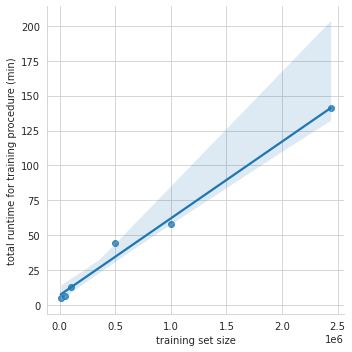

In [183]:
#sns.set_style('whitegrid')
sns_plot = sns.lmplot(x ='train_set_size', y ='train_time', data = df_train) 
           #markers =['o', '^'], scatter_kws={"s": 100})#, facet_kws={"legend_out":True})
# plt.plot(df.query('algorithm == "fzboost"')['size'],
#          df.query('algorithm == "fzboost"')['total_time'], 'o', ms=3, label='FlexZBoost')
#plt.plot(x2, y2, '^', label='BPZ')
plt.xlabel('training set size') 
plt.ylabel('total runtime for training procedure (min)')
plt.tight_layout()
sns_plot.figure.savefig('train.png',dpi=300)

#plt.savefig('linear.png')

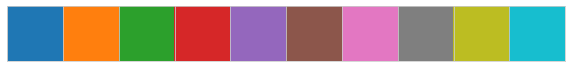

In [180]:
current_pallete = sns.color_palette()
sns.palplot(current_pallete)

In [154]:
test_name

['test_train_10k',
 'test_train_50k',
 'test_train_100k',
 'test_train_500k',
 'test_train_1M',
 'test_train_2.4M']

In [155]:
estimate_time = []
estimate_time_string = []
for i in range(43):
    for test in test_name:
        if (test_results_table['Test name (process ID)'][i] == test 
            and test_results_table['PZ algorithm'][i] == "FlexZBoost"):
            estimate_time_string.append(test_results_table['Duration'][i])
            t1 = time.strptime(test_results_table['Duration'][i],'%H:%M:%S')
            t1_sec = datetime.timedelta(hours=t1.tm_hour,minutes=t1.tm_min,seconds=t1.tm_sec).total_seconds()
            estimate_time.append(t1_sec/60.)    

In [156]:
estimate_time

[140.25, 70.4, 55.45, 55.8, 56.0, 55.8]

In [166]:
df_estimate = pd.DataFrame({
    'train_set_size': train_set_size,
    'estimate_time': estimate_time, 
    'estimate_time_string': estimate_time_string, 
    'test_name': test_name 
})    

In [167]:
#df_estimate.drop(0, inplace=True) # remove outlier
df_estimate

,train_set_size,estimate_time,estimate_time_string,test_name
0,10000,140.25,2:20:15,test_train_10k
1,50000,70.40,1:10:24,test_train_50k
2,100000,55.45,0:55:27,test_train_100k
3,500000,55.80,0:55:48,test_train_500k
4,1000000,56.00,0:56:00,test_train_1M
5,2437615,55.80,0:55:48,test_train_2.4M


In [169]:
from scipy.optimize import curve_fit
model = lambda x,a,b,c: a * np.exp(-x/b) + c
# Fit parameters
xdata = df_estimate.train_set_size
ydata = df_estimate.estimate_time
par_opt, par_cov = curve_fit(model, xdata, ydata)
print(par_opt)

[ 1.          1.         72.28333333]


/home/julia/miniconda3/envs/rail/lib/python3.11/site-packages/scipy/optimize/_minpack_py.py:1010: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


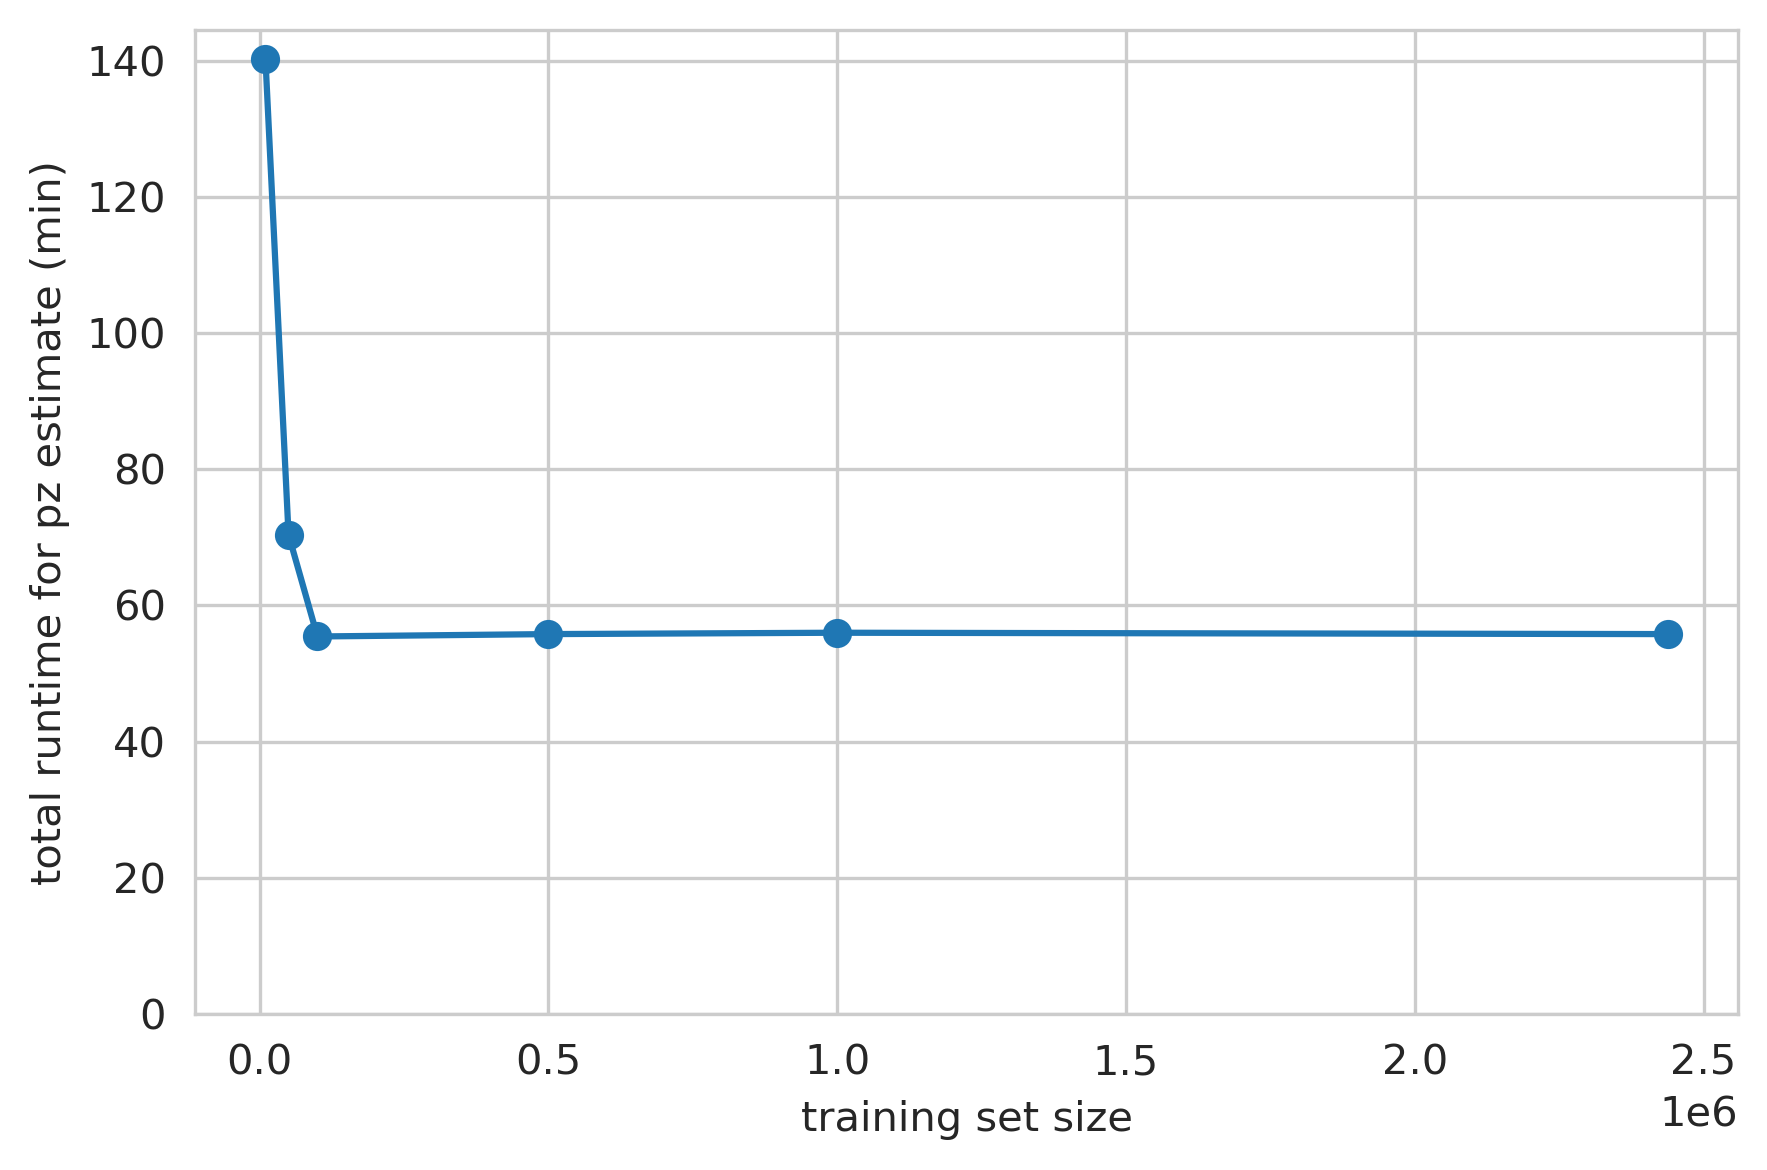

In [187]:
# Plot observed and fitted curves
plt.figure(dpi=300)
plt.plot(xdata, ydata, 'o-', color='#1f77b4')# alpha=0.6)
#plt.plot(xdata, model(xdata, *par_opt), '--r')
plt.xlabel('training set size') 
plt.ylabel('total runtime for pz estimate (min)')
plt.ylim(0,)
plt.tight_layout() 
plt.savefig('estimate.png')


/home/julia/miniconda3/envs/rail/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
/tmp/ipykernel_12486/3015355129.py:9: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


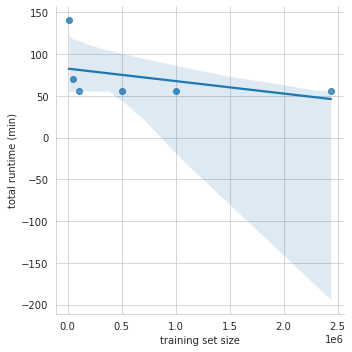

In [171]:
#sns.set_style('whitegrid')
sns_plot = sns.lmplot(x ='train_set_size', y ='estimate_time', data = df_estimate) 
           #markers =['o', '^'], scatter_kws={"s": 100})#, facet_kws={"legend_out":True})
# plt.plot(df.query('algorithm == "fzboost"')['size'],
#          df.query('algorithm == "fzboost"')['total_time'], 'o', ms=3, label='FlexZBoost')
#plt.plot(x2, y2, '^', label='BPZ')
plt.xlabel('training set size') 
plt.ylabel('total runtime (min)')
plt.tight_layout()
#sns_plot.figure.savefig('linear.png',dpi=300)

#plt.savefig('linear.png')

--- 
### Test dependency on storage system 

TBD: explicação 

In [32]:
import numpy as np
import pandas as pd
import tables_io
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats

%matplotlib inline

In [33]:
df_t0 = pd.read_csv('results/tests/test_hardware_t0.csv')
df_t1 = pd.read_csv('results/tests/test_hardware_t1.csv')

In [34]:
df_t0.columns

Index(['task_id', 'time_begin', 'time_end', 'time_diff', 'file_name', 'chunks',
       'host'],
      dtype='object')

In [35]:
df_t1.columns

Index(['task_id', 'time_begin', 'time_end', 'time_diff', 'file_name', 'chunks',
       'host'],
      dtype='object')

In [36]:
df_t0.head()

,task_id,time_begin,time_end,time_diff,file_name,chunks,host
0,55,1900-07-13 22:38:24,1900-07-13 22:42:00,216.0,objectTable_tract_4860_DC2_2_2i_runs_DP0_2_v23...,139550,10.148.0.12
1,11,1900-07-13 22:38:23,1900-07-13 22:42:07,224.0,objectTable_tract_3449_DC2_2_2i_runs_DP0_2_v23...,139048,10.148.0.12
2,39,1900-07-13 22:38:23,1900-07-13 22:42:09,226.0,objectTable_tract_4231_DC2_2_2i_runs_DP0_2_v23...,142851,10.148.0.12
3,98,1900-07-13 22:38:25,1900-07-13 22:42:54,269.0,objectTable_tract_3257_DC2_2_2i_runs_DP0_2_v23...,143026,10.148.0.12
4,112,1900-07-13 22:38:25,1900-07-13 22:43:33,308.0,objectTable_tract_4435_DC2_2_2i_runs_DP0_2_v23...,141872,10.148.0.12


In [37]:
df_t0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1935 entries, 0 to 1934
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   task_id     1935 non-null   int64  
 1   time_begin  1935 non-null   object 
 2   time_end    1935 non-null   object 
 3   time_diff   1935 non-null   float64
 4   file_name   1935 non-null   object 
 5   chunks      1935 non-null   int64  
 6   host        1935 non-null   object 
dtypes: float64(1), int64(2), object(4)
memory usage: 105.9+ KB


In [38]:
df_t1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1935 entries, 0 to 1934
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   task_id     1935 non-null   int64  
 1   time_begin  1935 non-null   object 
 2   time_end    1935 non-null   object 
 3   time_diff   1935 non-null   float64
 4   file_name   1935 non-null   object 
 5   chunks      1935 non-null   int64  
 6   host        1935 non-null   object 
dtypes: float64(1), int64(2), object(4)
memory usage: 105.9+ KB


In [39]:
hosts_t0 = []
hosts_t1 = []
for key, value in apollo_dict.items():
    if key in df_t0['host'].unique():
        hosts_t0.append(value)
    if key in df_t1['host'].unique():
        hosts_t1.append(value)
print('hosts present in df_t0:')
print(hosts_t0)
print('hosts present in df_t1:')
print(hosts_t1)

hosts present in df_t0:
['apl02', 'apl04', 'apl06', 'apl08', 'apl10', 'apl12', 'apl14']
hosts present in df_t1:
['apl02', 'apl04', 'apl06', 'apl08', 'apl10', 'apl12', 'apl14']


In [40]:
df_t0['speed'] = (df_t0['time_diff']/df_t0['chunks'])*1000.
df_t1['speed'] = (df_t1['time_diff']/df_t1['chunks'])*1000.

In [41]:
colors_blue = {'apl02' : '#0000FF', # (Blue)
                'apl04' : '#4169E1', # (Royal Blue)
                'apl06' : '#1E90FF', # (Dodger Blue)
                'apl08' : '#6495ED', # (Cornflower Blue)
                'apl10' : '#00BFFF', # (Deep Sky Blue)
                'apl12' : '#1E88E5', # (Blue (Vivid)
                'apl14' : '#4682B4'} # (Steel Blue)
                # 'apl16' : '#5F9EA0', # (Cadet Blue)
                # 'apl09' : '#87CEEB', # (Sky Blue)
                # 'apl10' : '#87CEFA', # (Light Sky Blue)
                # 'apl11' : '#ADD8E6', # (Light Blue)
                # 'apl12' : '#B0E0E6'} # (Powder Blue)

    
colors_green = {'apl02' : '#006400', # (Dark Green)
               'apl04' : '#008000', # (Green)
               'apl06' : '#0F9D58', # (Emerald Green)
               'apl08' : '#228B22', # (Forest Green)
               'apl10' : '#2E8B57', # (Sea Green)
               'apl12' : '#32CD32', # (Lime Green)
               'apl14' : '#3CB371'} # (Medium Sea Green)
               # 'apl0' : '#66CDAA', # (Medium Aquamarine)
               # 'apl0' : '#98FB98', # (Pale Green)
               # 'apl0' : '#ADFF2F', # (Green Yellow)
               # 'apl' : '#C0FF3E', # (Yellow Green)
               # 'apl' : '#DAF7A6'} # (Mint Green)  

In [42]:
mean_t0 = np.mean(df_t0['speed'])
mean_t1 = np.mean(df_t1['speed'])
median_t0 = np.median(df_t0['speed'])
median_t1 = np.median(df_t1['speed'])
std_t0 = np.std(df_t0['speed'])
std_t1 = np.std(df_t1['speed'])

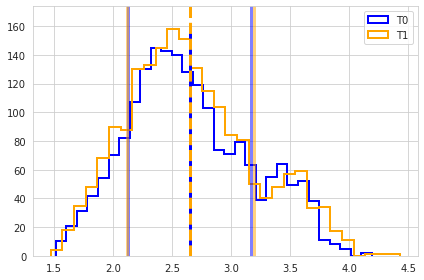

In [43]:
n0, bins0, patches0 = plt.hist(df_t0['speed'], histtype='step', lw=2, bins=30, label='T0', color='blue')
n1, bins1, patches1 = plt.hist(df_t1['speed'], histtype='step', lw=2, bins=30, label='T1', color='orange')
plt.vlines(mean_t0, ymin=0, ymax=1.1*np.max(n0), lw=3, color="blue")
plt.vlines(mean_t1, ymin=0, ymax=1.1*np.max(n1), lw=3, color="orange", ls="--")
ymax = np.max([1.1*np.max(n0),1.1*np.max(n1)])
plt.vlines(mean_t0-std_t0, ymin=0, ymax=ymax, lw=3, alpha = 0.5, color="blue")
plt.vlines(mean_t0+std_t0, ymin=0, ymax=ymax, lw=3, alpha = 0.5, color="blue")
plt.vlines(mean_t1-std_t1, ymin=0, ymax=ymax, lw=3, alpha = 0.5, color="orange")
plt.vlines(mean_t1+std_t1, ymin=0, ymax=ymax, lw=3, alpha = 0.5, color="orange")
plt.ylim(0,ymax)
plt.legend()
plt.tight_layout()

In [44]:
mean_t0, mean_t1

(2.6492555410158474, 2.6542596461746695)

In [45]:
res_t0 = stats.bootstrap([df_t0['speed']], np.mean, confidence_level=0.9)
res_t1 = stats.bootstrap([df_t1['speed']], np.mean, confidence_level=0.9)

In [46]:
res.confidence_interval

NameError: name 'res' is not defined

In [ ]:
fig, ax = plt.subplots()
ax.hist(res_t0.bootstrap_distribution, bins=25, label='t0', alpha=0.8)#, histtype='step')
ax.hist(res_t1.bootstrap_distribution, bins=25, label='t1', alpha=0.5)
ax.set_title('Bootstrap Distribution')
ax.set_xlabel('speed mean')
ax.set_ylabel('frequency')
plt.legend()

In [ ]:
x = np.array(df_t0['speed'])

In [ ]:
res = stats.bootstrap([df_t0['speed']], np.std, confidence_level=0.9)
fig, ax = plt.subplots()
ax.hist(res.bootstrap_distribution, bins=25)
ax.set_title('Bootstrap Distribution')
ax.set_xlabel('statistic value')
ax.set_ylabel('frequency')
plt.show()

As the two distributions are approximatelly normal, let's use a t-test to demonstrate that they are not significantly different. 

- Null hipotesis ($H_0$) = the distrubutions are equal
- Alternative hipotesis ($H_1$) = the distrubutions are different

Assumptions:
- The samples are independent
- The data follow a normal distribution
- The samples have similar variances (homogeneity assumption)

Check homogenity assumption:

In [ ]:
np.var(df_t0['speed']), np.var(df_t1['speed'])

_"If the ratio of the larger data groups to the small data group is less than 4:1 then we can consider that the given data groups have equal variance."_ 

In [ ]:
np.var(df_t1['speed']) / np.var(df_t0['speed'])

ok!

or, use [Levene test](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.levene.html):

In [ ]:
stats.levene(df_t0['speed'], df_t1['speed'])

Levene test's p-value > 0.05 $=>$ the variances are not significantly different. 

In [ ]:
# Perform the two sample t-test with equal variances
test_result = stats.ttest_ind(a=df_t0['speed'], b=df_t1['speed'])
test_result

In [ ]:
test_result.pvalue

Here, since the p-value (~0.77) is greater than alpha = 0.05, we cannot reject the null hypothesis of the test. We do not have sufficient evidence to say that the mean speed using T0 is faster than using T1. 


Clean up memory:

In [ ]:
del df_t0, df_t1

---
### Test impact of data cleaning  - FlexZBoost

TBD: explicação

In [ ]:
import numpy as np
import pandas as pd
import tables_io
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats

%matplotlib inline

In [ ]:
apollo_dict = {'10.148.0.11' : 'apl01', 
            '10.148.0.12' : 'apl02', 
            '10.148.0.13' : 'apl03', 
            '10.148.0.14' : 'apl04', 
            '10.148.0.15' : 'apl05', 
            '10.148.0.16' : 'apl06', 
            '10.148.0.17' : 'apl07', 
            '10.148.0.18' : 'apl08', 
            '10.148.0.19' : 'apl09', 
            '10.148.0.27' : 'apl10', 
            '10.148.0.28' : 'apl11', 
            '10.148.0.29' : 'apl12', 
            '10.148.0.30' : 'apl13', 
            '10.148.0.31' : 'apl14', 
            '10.148.0.32' : 'apl15'}

In [ ]:
#df_all = pd.read_csv('results/tests/test_hardware_t1.csv')
#df_4 = pd.read_csv('results/tests/fzboost_trunc4_chunk_150k.csv')
df_all = pd.read_csv('results/tests/fzboost_all_dec_cases_chunk_150k_100x.csv')
df_4 = pd.read_csv('results/tests/fzboost_trunc4_chunk_150k_100x.csv')

In [ ]:
df_all.columns

In [ ]:
df_4.columns

In [ ]:
df_all.head()

In [ ]:
df_all.info()

In [ ]:
df_4.info()

In [ ]:
hosts_all = []
hosts_4 = []
for key, value in apollo_dict.items():
    if key in df_all['host'].unique():
        hosts_all.append(value)
    if key in df_4['host'].unique():
        hosts_4.append(value)
print('hosts present in df_all:')
print(hosts_all)
print('hosts present in df_4:')
print(hosts_4)

In [ ]:
df_all['speed'] = (df_all['time_diff']/df_all['chunks'])*1000.
df_4['speed'] = (df_4['time_diff']/df_4['chunks'])*1000.

In [ ]:
colors_blue = {'apl01' : '#000080', # (Navy Blue)
               'apl02' : '#0000CD', # (Medium Blue)
               'apl03' : '#0000FF', # (Blue)
               'apl04' : '#191970', # (Midnight Blue)
               'apl05' : '#1E90FF', # (Dodger Blue)
               'apl06' : '#4169E1', # (Royal Blue)
               'apl07' : '#4682B4', # (Steel Blue)
               'apl08' : '#5F9EA0', # (Cadet Blue)
               'apl09' : '#6495ED', # (Cornflower Blue)
               'apl10' : '#87CEEB', # (Sky Blue)
               'apl11' : '#87CEFA', # (Light Sky Blue)
               'apl12' : '#ADD8E6', # (Light Blue)
               #'apl13' : '#B0E0E6', # (Powder Blue)
               #'apl14' : '#00BFFF', # (Deep Sky Blue)
               #'apl15' : '#1E88E5'} # (Blue (Vivid))
                'apl13' : '#781345',  
                'apl14' : '#7b4047',  
                'apl15' : '#c46672'}  

                
    
colors_green = {'apl01' : '#004225', # (Dark Green)
                'apl02' : '#0B6623', # (Forest Green)
                'apl03' : '#0F9D58', # (Emerald Green)
                'apl04' : '#1E8449', # (Shamrock Green)
                'apl05' : '#228B22', # (Green)
                'apl06' : '#2E8B57', # (Sea Green)
                'apl07' : '#32CD32', # (Lime Green)
                'apl08' : '#3CB371', # (Medium Sea Green)
                'apl09' : '#48D1CC', # (Medium Turquoise)
                'apl10' : '#66CDAA', # (Medium Aquamarine)
                'apl11' : '#7FFFD4', # (Aquamarine)
                'apl12' : '#98FB98', # (Pale Green)
                #'apl13' : '#ADFF2F', # (Green Yellow)
                #'apl14' : '#C0FF3E', # (Yellow Green)
                #'apl15' : '#DAF7A6'} # (Mint Green)
                'apl13' : '#FFD700', ##ff1f09',  
                'apl14' : '#F0E68C', #'#ff7365',  
                'apl15' : '#FFFF00'} # '#ffc7c2'}  

#ff3b28
#ff5747

#ff8f84
#ffaba3


In [ ]:
mean_all = np.mean(df_all['speed'])
mean_4 = np.mean(df_4['speed'])
std_all = np.std(df_all['speed'])
std_4 = np.std(df_4['speed'])

In [ ]:
n0, bins0, patches0 = plt.hist(df_all['speed'], histtype='step', lw=2, bins=30, label='all cases', color='blue')
n1, bins1, patches1 = plt.hist(df_4['speed'], histtype='step', lw=2, bins=30, label='4 cases', color='orange')
plt.vlines(mean_all, ymin=0, ymax=1.1*np.max(n0), lw=3, color="blue", label="mean")
plt.vlines(mean_4, ymin=0, ymax=1.1*np.max(n1), lw=3, color="orange", label="mean")
ymax = np.max([1.1*np.max(n0),1.1*np.max(n1)])
plt.vlines(mean_all-std_all, ymin=0, ymax=ymax, lw=2, alpha = 0.5, color="blue", label="std", ls="--")
plt.vlines(mean_all+std_all, ymin=0, ymax=ymax, lw=2, alpha = 0.5, color="blue", ls="--")
plt.vlines(mean_4-std_4, ymin=0, ymax=ymax, lw=2, alpha = 0.5, color="orange", label="std", ls="--")
plt.vlines(mean_4+std_4, ymin=0, ymax=ymax, lw=2, alpha = 0.5, color="orange", ls="--")
plt.ylim(0,ymax)
plt.legend()
plt.tight_layout()

In [ ]:
plt.figure(figsize=[14,5])
plt.subplot(121)
plt.title('mags w/ all decimal cases')
for host, name in apollo_dict.items():
    plt.hist(df_all.query(f'host=="{host}"')['speed'],
         histtype='step', lw=2, bins=25,
         label=name, color = colors_blue[name]) 
plt.xlabel('pz compute speed$^{-1}$ (ms/obj)')
plt.ylabel('frequency')
plt.legend()
plt.subplot(122)
plt.title('mags round to 4 decimal cases')
for host, name in apollo_dict.items():
    plt.hist(df_4.query(f'host=="{host}"')['speed'],
         histtype='step', lw=2, bins=25,
         label=name, color = colors_blue[name]) 
plt.xlabel('pz compute speed$^{-1}$ (ms/obj)')
plt.ylabel('frequency')
plt.legend()
plt.tight_layout()
plt.savefig('fzboost_speed_rount_all_vs_4cases.png')

In [ ]:
test = 'fzboost round 4 decimal cases'
plt.figure(figsize=[20,8])
plt.suptitle(test)
i=0
for key, value in apollo_dict.items(): 
    i+=1
    plt.subplot(3,5,i)
    plt.title(value)
    speeds = df_4.query(f'host=="{key}"')['speed']
    n0, bins0, patches0 = plt.hist(speeds, histtype='stepfilled', 
                                   lw=2, bins=30, alpha=0.5)
    ymax = 1.1*np.max(n0)
    plt.vlines(mean_4, ymin=0, ymax=ymax, lw=2, 
               color="k", label=f'global mean: {round(mean_4, 2)}')
    plt.vlines(np.mean(speeds), ymin=0, ymax=ymax, lw=2, ls="--",
               color="r", label=f' {value} mean: {round(np.mean(speeds), 2)}')

    plt.legend()
    plt.xlabel('pz compute speed$^{-1}$ (ms/obj)')
    plt.ylabel('frequency')
    plt.xlim(0,6)
    plt.ylim(0,ymax)
plt.tight_layout()
plt.savefig('fzboost_4cases_apl_nodes.png')

In [ ]:
group1 =   ['10.148.0.11', 
            '10.148.0.12', 
            '10.148.0.13', 
            '10.148.0.14', 
            '10.148.0.15', 
            '10.148.0.16', 
            '10.148.0.17', 
            '10.148.0.18', 
            '10.148.0.19', 
            '10.148.0.27', 
            '10.148.0.28', 
            '10.148.0.29']
group2 = ['10.148.0.30',  
          '10.148.0.31',  
          '10.148.0.32']  

In [ ]:
fast_nodes = 'host == "10.148.0.11" '
for host in group1[1:]:
    fast_nodes += f'| host == "{host}" '
slow_nodes = 'host == "10.148.0.30" | host == "10.148.0.31" | host == "10.148.0.32" '  
df_all_fast = df_all.query(fast_nodes)    
df_4_fast = df_4.query(fast_nodes)    
df_all_slow = df_all.query(slow_nodes)    
df_4_slow = df_4.query(slow_nodes)    

In [ ]:
mean_all_fast = np.mean(df_all_fast['speed'])
mean_all_slow = np.mean(df_all_slow['speed'])
mean_4_fast = np.mean(df_4_fast['speed'])
mean_4_slow = np.mean(df_4_slow['speed'])
std_all_fast = np.std(df_all_fast['speed'])
std_all_slow = np.std(df_all_slow['speed'])
std_4_fast = np.std(df_4_fast['speed'])
std_4_slow = np.std(df_4_slow['speed'])

In [ ]:
df_all_fast.groupby(['host'])['host'].count()

In [ ]:
df_all_slow.groupby(['host'])['host'].count()

In [ ]:
plt.figure(figsize=[12,4])
plt.subplot(121)
plt.title('fast nodes')
fast_all = df_all['host'].isin(group1)
fast_4 = df_4['host'].isin(group1)
nall, binsall, patchesall = plt.hist(df_all[fast_all]['speed'], histtype='step', lw=2, bins=50,
        label='all cases', color='blue')
n4, bins4, patches4 = plt.hist(df_4[fast_4]['speed'], histtype='step', lw=2, bins=50,
        label='4 cases', color='green')
ymax = np.max([1.1*np.max(nall),1.1*np.max(n4)])
plt.ylim(0,ymax)
plt.vlines(mean_all_fast, ymin=0, ymax=ymax, lw=3, color="blue", label=f'mean:{round(mean_all_fast,4)}')
plt.vlines(mean_4_fast, ymin=0, ymax=ymax, lw=3, color="green", label=f'mean:{round(mean_4_fast, 4)}')
plt.vlines(mean_all_fast-std_all_fast, ymin=0, ymax=ymax, lw=2, alpha = 0.5, 
           color="blue", ls="--", label=f'std:{round(std_all_fast, 4)}')
plt.vlines(mean_all_fast+std_all_fast, ymin=0, ymax=ymax, lw=2, alpha = 0.5, color="blue", ls="--")
plt.vlines(mean_4_fast-std_4_fast, ymin=0, ymax=ymax, lw=2, alpha = 0.5, 
           color="green", ls="--", label=f'std:{round(std_4_fast, 4)}')
plt.vlines(mean_4_fast+std_4_fast, ymin=0, ymax=ymax, lw=2, alpha = 0.5, color="green", ls="--")
plt.legend()
plt.xlabel('pz compute inverse velocity (ms/obj)')
plt.ylabel('processes count')

plt.subplot(122)
plt.title('slow nodes')
slow_all = df_all['host'].isin(group2)
slow_4 = df_4['host'].isin(group2)
nall, binsall, patchesall = plt.hist(df_all[slow_all]['speed'], histtype='step', lw=2, bins=50,
        label='all cases', color='#781345')
n4, bins4, patches4 = plt.hist(df_4[slow_4]['speed'], histtype='step', lw=2, bins=50,
        label='4 cases', color='#FFD700')
ymax = np.max([1.1*np.max(nall),1.1*np.max(n4)])
plt.ylim(0,ymax)
plt.vlines(mean_all_slow, ymin=0, ymax=ymax, lw=3, color="#781345", label=f'mean:{round(mean_all_slow,4)}')
plt.vlines(mean_4_slow, ymin=0, ymax=ymax, lw=3, color="#FFD700", label=f'mean:{round(mean_4_slow, 4)}')
plt.vlines(mean_all_slow-std_all_slow, ymin=0, ymax=ymax, lw=2, alpha = 0.5, 
           color="#781345", ls="--", label=f'std:{round(std_all_slow, 4)}')
plt.vlines(mean_all_slow+std_all_slow, ymin=0, ymax=ymax, lw=2, alpha = 0.5, color="#781345", ls="--")
plt.vlines(mean_4_slow-std_4_slow, ymin=0, ymax=ymax, lw=2, alpha = 0.5, 
           color="#FFD700", ls="--", label=f'std:{round(std_4_slow, 4)}')
plt.vlines(mean_4_slow+std_4_slow, ymin=0, ymax=ymax, lw=2, alpha = 0.5, color="#FFD700", ls="--")

plt.legend()
plt.ylim(0,ymax)
plt.xlabel('pz compute inverse velocity (ms/obj)')
plt.ylabel('processes count')

plt.tight_layout()

In [ ]:
res_all_fast = stats.bootstrap([df_all_fast['speed']], np.mean, confidence_level=0.9)
res_4_fast = stats.bootstrap([df_4_fast['speed']], np.mean, confidence_level=0.9)
res_all_slow = stats.bootstrap([df_all_slow['speed']], np.mean, confidence_level=0.9)
res_4_slow = stats.bootstrap([df_4_slow['speed']], np.mean, confidence_level=0.9)


In [ ]:
res.confidence_interval

In [ ]:
fig, ax = plt.subplots()
ax.hist(res_all_fast.bootstrap_distribution, bins=25, label='all fast')#, histtype='step')
ax.hist(res_4_fast.bootstrap_distribution, bins=25, label='4 fast')
ax.set_title('Bootstrap Distribution')
ax.set_xlabel('speed mean')
ax.set_ylabel('frequency')
plt.legend()

In [ ]:
fig, ax = plt.subplots()
ax.hist(res_all_slow.bootstrap_distribution, bins=25, label='all slow', alpha=0.8)
ax.hist(res_4_slow.bootstrap_distribution, bins=25, label='4 slow', alpha=0.5)
ax.set_title('Bootstrap Distribution')
ax.set_xlabel('statistic value')
ax.set_ylabel('frequency')
plt.legend()

In [ ]:
res.standard_error

As the two distributions are approximatelly normal, let's use a t-test to demonstrate that they are not significantly different. 

- Null hipotesis ($H_0$) = the distrubutions are equal
- Alternative hipotesis ($H_1$) = the distrubutions are different

Assumptions:
- The samples are independent
- The data follow a normal distribution
- The samples have similar variances (homogeneity assumption)

Check homogenity assumption:

In [ ]:
stats.levene(df_all_fast['speed'], df_4_fast['speed'])

In [ ]:
stats.levene(df_all_slow['speed'], df_4_slow['speed'])

Levene test's p-value > 0.05 $=>$ the variances are not significantly different. 

In [ ]:
# Perform the two sample t-test with equal variances
test_result = stats.ttest_ind(a=df_all_fast['speed'], b=df_4_fast['speed'])
test_result

In [ ]:
# Perform the two sample t-test with equal variances
test_result = stats.ttest_ind(a=df_all_slow['speed'], b=df_4_slow['speed'])
test_result

In [ ]:
test_result.pvalue

Here, since the p-value is very small, therefore smaller than alpha = 0.05, we can reject the null hypothesis of the test. We have sufficient evidence to say that the mean speed using round magniudes is faster than using the original data with all decimal cases. 


Clean up memory:

In [ ]:
del df_all, df_4, df_all_fast, df_all_slow, df_4_fast, df_4_slow

### Test impact of data cleaning  - BPZ

TBD: explicação

In [ ]:
import numpy as np
import pandas as pd
import tables_io
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats

%matplotlib inline

In [ ]:
apollo_dict = {'10.148.0.11' : 'apl01', 
            '10.148.0.12' : 'apl02', 
            '10.148.0.13' : 'apl03', 
            '10.148.0.14' : 'apl04', 
            '10.148.0.15' : 'apl05', 
            '10.148.0.16' : 'apl06', 
            '10.148.0.17' : 'apl07', 
            '10.148.0.18' : 'apl08', 
            '10.148.0.19' : 'apl09', 
            '10.148.0.27' : 'apl10', 
            '10.148.0.28' : 'apl11', 
            '10.148.0.29' : 'apl12', 
            '10.148.0.30' : 'apl13', 
            '10.148.0.31' : 'apl14', 
            '10.148.0.32' : 'apl15'}

In [ ]:
df_all = pd.read_csv('results/tests/bpz_all_dec_cases_chunk_150k.csv')
df_4 = pd.read_csv('results/tests/bpz_trunc4_chunk_150k.csv')

In [ ]:
df_all.columns

In [ ]:
df_4.columns

In [ ]:
df_all.head()

In [ ]:
df_all.info()

In [ ]:
df_4.info()

In [ ]:
hosts_all = []
hosts_4 = []
for key, value in apollo_dict.items():
    if key in df_all['host'].unique():
        hosts_all.append(value)
    if key in df_4['host'].unique():
        hosts_4.append(value)
print('hosts present in df_all:')
print(hosts_all)
print('hosts present in df_4:')
print(hosts_4)

In [ ]:
df_all['speed'] = (df_all['time_diff']/df_all['chunks'])*1000.
df_4['speed'] = (df_4['time_diff']/df_4['chunks'])*1000.

In [ ]:
colors_blue = {'apl01' : '#000080', # (Navy Blue)
               'apl02' : '#0000CD', # (Medium Blue)
               'apl03' : '#0000FF', # (Blue)
               'apl04' : '#191970', # (Midnight Blue)
               'apl05' : '#1E90FF', # (Dodger Blue)
               'apl06' : '#4169E1', # (Royal Blue)
               'apl07' : '#4682B4', # (Steel Blue)
               'apl08' : '#5F9EA0', # (Cadet Blue)
               'apl09' : '#6495ED', # (Cornflower Blue)
               'apl10' : '#87CEEB', # (Sky Blue)
               'apl11' : '#87CEFA', # (Light Sky Blue)
               'apl12' : '#ADD8E6', # (Light Blue)
               #'apl13' : '#B0E0E6', # (Powder Blue)
               #'apl14' : '#00BFFF', # (Deep Sky Blue)
               #'apl15' : '#1E88E5'} # (Blue (Vivid))
                'apl13' : '#781345',  
                'apl14' : '#7b4047',  
                'apl15' : '#c46672'}  

                
    
colors_green = {'apl01' : '#004225', # (Dark Green)
                'apl02' : '#0B6623', # (Forest Green)
                'apl03' : '#0F9D58', # (Emerald Green)
                'apl04' : '#1E8449', # (Shamrock Green)
                'apl05' : '#228B22', # (Green)
                'apl06' : '#2E8B57', # (Sea Green)
                'apl07' : '#32CD32', # (Lime Green)
                'apl08' : '#3CB371', # (Medium Sea Green)
                'apl09' : '#48D1CC', # (Medium Turquoise)
                'apl10' : '#66CDAA', # (Medium Aquamarine)
                'apl11' : '#7FFFD4', # (Aquamarine)
                'apl12' : '#98FB98', # (Pale Green)
                #'apl13' : '#ADFF2F', # (Green Yellow)
                #'apl14' : '#C0FF3E', # (Yellow Green)
                #'apl15' : '#DAF7A6'} # (Mint Green)
                'apl13' : '#FFD700', ##ff1f09',  
                'apl14' : '#F0E68C', #'#ff7365',  
                'apl15' : '#FFFF00'} # '#ffc7c2'}  

#ff3b28
#ff5747

#ff8f84
#ffaba3


In [ ]:
mean_all = np.mean(df_all['speed'])
mean_4 = np.mean(df_4['speed'])
std_all = np.std(df_all['speed'])
std_4 = np.std(df_4['speed'])

In [ ]:
n0, bins0, patches0 = plt.hist(df_all['speed'], histtype='step', lw=2, bins=30, label='all cases', color='blue')
n1, bins1, patches1 = plt.hist(df_4['speed'], histtype='step', lw=2, bins=30, label='4 cases', color='orange')
plt.vlines(mean_all, ymin=0, ymax=1.1*np.max(n0), lw=3, color="blue", label="mean")
plt.vlines(mean_4, ymin=0, ymax=1.1*np.max(n1), lw=3, color="orange", label="mean")
ymax = np.max([1.1*np.max(n0),1.1*np.max(n1)])
plt.vlines(mean_all-std_all, ymin=0, ymax=ymax, lw=2, alpha = 0.5, color="blue", label="std", ls="--")
plt.vlines(mean_all+std_all, ymin=0, ymax=ymax, lw=2, alpha = 0.5, color="blue", ls="--")
plt.vlines(mean_4-std_4, ymin=0, ymax=ymax, lw=2, alpha = 0.5, color="orange", label="std", ls="--")
plt.vlines(mean_4+std_4, ymin=0, ymax=ymax, lw=2, alpha = 0.5, color="orange", ls="--")
plt.ylim(0,ymax)
plt.legend()
plt.tight_layout()

In [ ]:
plt.figure(figsize=[12,4])
plt.subplot(121)
plt.title('mags w/ all decimal cases')
for host, name in apollo_dict.items():
    plt.hist(df_all.query(f'host=="{host}"')['speed'],
         histtype='step', lw=2, bins=50,
         label=name, color = colors_blue[name]) 

plt.legend()
plt.subplot(122)
plt.title('mags round to 4 decimal cases')
for host, name in apollo_dict.items():
    plt.hist(df_4.query(f'host=="{host}"')['speed'],
         histtype='step', lw=2, bins=50,
         label=name, color = colors_green[name]) 
plt.legend()
plt.tight_layout()

In [ ]:
group1 =   ['10.148.0.11', 
            '10.148.0.12', 
            '10.148.0.13', 
            '10.148.0.14', 
            '10.148.0.15', 
            '10.148.0.16', 
            '10.148.0.17', 
            '10.148.0.18', 
            '10.148.0.19', 
            '10.148.0.27', 
            '10.148.0.28', 
            '10.148.0.29']
group2 = ['10.148.0.30',  
          '10.148.0.31',  
          '10.148.0.32']  

In [ ]:
fast_nodes = 'host == "10.148.0.11" '
for host in group1[1:]:
    fast_nodes += f'| host == "{host}" '
slow_nodes = 'host == "10.148.0.30" | host == "10.148.0.31" | host == "10.148.0.32" '  
df_all_fast = df_all.query(fast_nodes)    
df_4_fast = df_4.query(fast_nodes)    
df_all_slow = df_all.query(slow_nodes)    
df_4_slow = df_4.query(slow_nodes)    

In [ ]:
mean_all_fast = np.mean(df_all_fast['speed'])
mean_all_slow = np.mean(df_all_slow['speed'])
mean_4_fast = np.mean(df_4_fast['speed'])
mean_4_slow = np.mean(df_4_slow['speed'])
std_all_fast = np.std(df_all_fast['speed'])
std_all_slow = np.std(df_all_slow['speed'])
std_4_fast = np.std(df_4_fast['speed'])
std_4_slow = np.std(df_4_slow['speed'])

In [ ]:
df_all_fast.groupby(['host'])['host'].count()

In [ ]:
df_all_slow.groupby(['host'])['host'].count()

In [ ]:
plt.figure(figsize=[12,4])
plt.subplot(121)
plt.title('fast nodes')
fast_all = df_all['host'].isin(group1)
fast_4 = df_4['host'].isin(group1)
nall, binsall, patchesall = plt.hist(df_all[fast_all]['speed'], histtype='step', lw=2, bins=50,
        label='all cases', color='blue')
n4, bins4, patches4 = plt.hist(df_4[fast_4]['speed'], histtype='step', lw=2, bins=50,
        label='4 cases', color='green')
ymax = np.max([1.1*np.max(nall),1.1*np.max(n4)])
plt.ylim(0,ymax)
plt.vlines(mean_all_fast, ymin=0, ymax=ymax, lw=3, color="blue", label=f'mean:{round(mean_all_fast,4)}')
plt.vlines(mean_4_fast, ymin=0, ymax=ymax, lw=3, color="green", label=f'mean:{round(mean_4_fast, 4)}')
plt.vlines(mean_all_fast-std_all_fast, ymin=0, ymax=ymax, lw=2, alpha = 0.5, 
           color="blue", ls="--", label=f'std:{round(std_all_fast, 4)}')
plt.vlines(mean_all_fast+std_all_fast, ymin=0, ymax=ymax, lw=2, alpha = 0.5, color="blue", ls="--")
plt.vlines(mean_4_fast-std_4_fast, ymin=0, ymax=ymax, lw=2, alpha = 0.5, 
           color="green", ls="--", label=f'std:{round(std_4_fast, 4)}')
plt.vlines(mean_4_fast+std_4_fast, ymin=0, ymax=ymax, lw=2, alpha = 0.5, color="green", ls="--")
plt.legend()
plt.xlabel('pz compute inverse velocity (ms/obj)')
plt.ylabel('processes count')

plt.subplot(122)
plt.title('slow nodes')
slow_all = df_all['host'].isin(group2)
slow_4 = df_4['host'].isin(group2)
nall, binsall, patchesall = plt.hist(df_all[slow_all]['speed'], histtype='step', lw=2, bins=50,
        label='all cases', color='#781345')
n4, bins4, patches4 = plt.hist(df_4[slow_4]['speed'], histtype='step', lw=2, bins=50,
        label='4 cases', color='#FFD700')
ymax = np.max([1.1*np.max(nall),1.1*np.max(n4)])
plt.ylim(0,ymax)
plt.vlines(mean_all_slow, ymin=0, ymax=ymax, lw=3, color="#781345", label=f'mean:{round(mean_all_slow,4)}')
plt.vlines(mean_4_slow, ymin=0, ymax=ymax, lw=3, color="#FFD700", label=f'mean:{round(mean_4_slow, 4)}')
plt.vlines(mean_all_slow-std_all_slow, ymin=0, ymax=ymax, lw=2, alpha = 0.5, 
           color="#781345", ls="--", label=f'std:{round(std_all_slow, 4)}')
plt.vlines(mean_all_slow+std_all_slow, ymin=0, ymax=ymax, lw=2, alpha = 0.5, color="#781345", ls="--")
plt.vlines(mean_4_slow-std_4_slow, ymin=0, ymax=ymax, lw=2, alpha = 0.5, 
           color="#FFD700", ls="--", label=f'std:{round(std_4_slow, 4)}')
plt.vlines(mean_4_slow+std_4_slow, ymin=0, ymax=ymax, lw=2, alpha = 0.5, color="#FFD700", ls="--")

plt.legend()
plt.ylim(0,ymax)
plt.xlabel('pz compute inverse velocity (ms/obj)')
plt.ylabel('processes count')

plt.tight_layout()

In [ ]:
res_all_fast = stats.bootstrap([df_all_fast['speed']], np.mean, confidence_level=0.9)
res_4_fast = stats.bootstrap([df_4_fast['speed']], np.mean, confidence_level=0.9)
res_all_slow = stats.bootstrap([df_all_slow['speed']], np.mean, confidence_level=0.9)
res_4_slow = stats.bootstrap([df_4_slow['speed']], np.mean, confidence_level=0.9)


In [ ]:
res.confidence_interval

In [ ]:
fig, ax = plt.subplots()
ax.hist(res_all_fast.bootstrap_distribution, bins=25, label='all fast')#, histtype='step')
ax.hist(res_4_fast.bootstrap_distribution, bins=25, label='4 fast')
ax.set_title('Bootstrap Distribution')
ax.set_xlabel('speed mean')
ax.set_ylabel('frequency')
plt.legend()

As the two distributions are approximatelly normal, let's use a t-test to demonstrate that they are not significantly different. 

- Null hipotesis ($H_0$) = the distrubutions are equal
- Alternative hipotesis ($H_1$) = the distrubutions are different

Assumptions:
- The samples are independent
- The data follow a normal distribution
- The samples have similar variances (homogeneity assumption)

Check homogenity assumption:

In [ ]:
stats.levene(df_all_fast['speed'], df_4_fast['speed'])

In [ ]:
stats.levene(df_all_slow['speed'], df_4_slow['speed'])

Levene test's p-value > 0.05 $=>$ the variances are not significantly different. 

In [ ]:
# Perform the two sample t-test with equal variances
test_result = stats.ttest_ind(a=df_all_fast['speed'], b=df_4_fast['speed'])
test_result

In [ ]:
# Perform the two sample t-test with equal variances
test_result = stats.ttest_ind(a=df_all_slow['speed'], b=df_4_slow['speed'])
test_result

In [ ]:
test_result.pvalue

TBD: conclusion


Clean up memory:

In [ ]:
del df_all, df_4, df_all_fast, df_all_slow, df_4_fast, df_4_slow

### Test variation with posterior PDF size 

explicação (breve!)

## Discussion 


## Summary and Conclusions





## Future Work 


## Acknowledgement

## References


https://www.geeksforgeeks.org/how-to-conduct-a-two-sample-t-test-in-python/ 

https://www.datacamp.com/tutorial/an-introduction-to-python-t-tests